In [1]:
#import library

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('punkt')
nltk.download('stopwords')

!pip install Sastrawi
from nltk import word_tokenize
from nltk.corpus import stopwords as stpw
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 3.3 MB/s eta 0:00:00


In [2]:
#membaca data
data_mentah = pd.read_csv('train_preprocess.tsv.txt', sep='\t', names=['text', 'label'])
data_mentah = data_mentah.drop_duplicates()
df_alay = pd.read_csv('new_kamusalay.csv', names=['alay', 'cleaned'], encoding='latin-1')


In [3]:
#Cek ukuran data set
data_mentah.shape

(5226, 2)

In [4]:
#cek head
data_mentah.head()

text     label
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral
2  lokasi strategis di jalan sumatera bandung . t...  positive
3  betapa bahagia nya diri ini saat unboxing pake...  positive
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative

In [5]:
#Cek label value counts
data_mentah.label.value_counts()

positive    3077
negative    1613
neutral      535
Name: label, dtype: int64

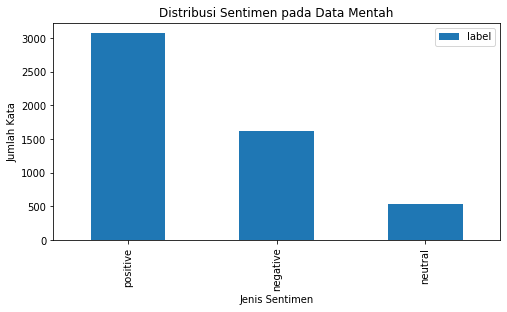

In [6]:
#Cek distribusi data dengan bar plot
data_mentah.label.value_counts().plot.bar(figsize = (8, 4))
plt.title('Distribusi Sentimen pada Data Mentah')
plt.xlabel('Jenis Sentimen')
plt.ylabel('Jumlah Kata')
plt.legend()
plt.show()

In [7]:
#menghitung total words
data_mentah['total_words']= data_mentah.text.apply(lambda sent: len(sent.split()))
data_mentah.head()

text     label  total_words
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive           66
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral           17
2  lokasi strategis di jalan sumatera bandung . t...  positive           33
3  betapa bahagia nya diri ini saat unboxing pake...  positive           17
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative           38

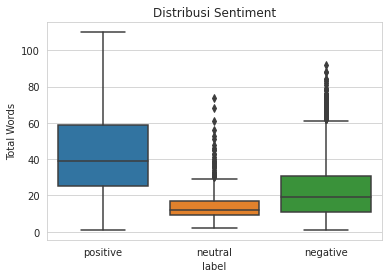

In [8]:
#Cek distribusi data dengan whisker plot
sns.set_style('whitegrid')
sns.boxplot(y = data_mentah['total_words'], x = data_mentah['label']);
plt.ylabel('Total Words')
plt.title('Distribusi Sentiment')
plt.show()

<function matplotlib.pyplot.legend(*args, **kwargs)>

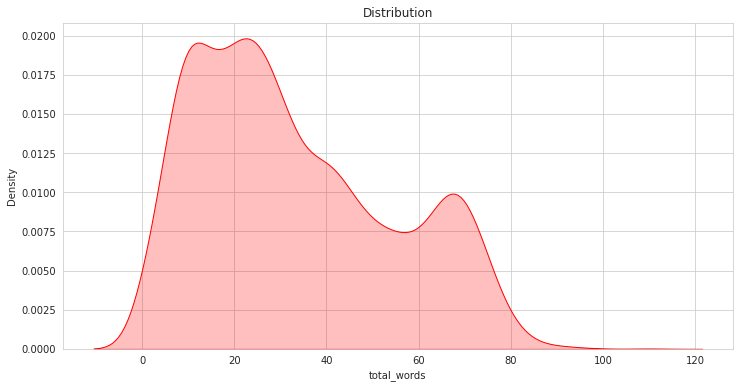

In [9]:
#Cek Distribusi Data

plt.figure(figsize = (12,6))
p1 = sns.kdeplot(data_mentah['total_words'],shade = True, color = 'r').set_title('Distribution')
plt.legend


Distribusi data skewness kiri, tidak normal

Cleaning Data

In [10]:
#Membuat Stopwords
list_stopwords = stpw.words('indonesian')
list_stopwords_en = stpw.words ('english')
list_stopwords.extend(list_stopwords_en)
list_stopwords.extend(['nya', 'ya','ga','yg','kali','yuk','jgn'])
list_stopwords_baru = list_stopwords

len(list_stopwords_baru)


944

In [13]:
#Fungsi buat cleaning=================================================================================
def lowercase(text):                                #remove lowercase
    return text.lower()

def nonalphanumeric(text):                          #remove nonaplhanumeric
    text = re.sub(r'[^0-9a-zA-Z]+', ' ',text, flags= re.MULTILINE)
    return text

def unnecessary_char(text):
    text = re.sub(r'\W',' ',str(text), flags= re.MULTILINE)                                                 #Remove every special charachters
    text = re.sub(r'rt',' ',text, flags= re.MULTILINE)                                                      #Remove every retweet symbol
    text = re.sub(r'user',' ',text, flags= re.MULTILINE)                                                    #Remove every username
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text, flags= re.MULTILINE)      #Remove every URL
    text = re.sub(r'\s+', ' ', text, flags= re.MULTILINE)                                                   #Subtitute multi spaces with single space
    return text

format_alay = dict(zip(df_alay['alay'], df_alay['cleaned']))                                                #formating kamusalay
def cleaning_alay(text):                                                                                    #Remove 'alay' words
    split_text_alay = text.split()
    text_alay = [format_alay.get(x,x) for x in split_text_alay]
    cleaned_alay = ' '.join(text_alay)
    return cleaned_alay

def StopWords(text):                                                                                        #Create Stopwords lists
    text_tokens = word_tokenize(text)
    tokens_without_stopwords = [word for word in text_tokens if not word in list_stopwords_baru]
    without_stopwords = ' '.join(tokens_without_stopwords)
    return without_stopwords

def stemming(text):
    return stemmer.stem(text)

#Function for text cleansing
def cleaning (text):
    text = lowercase(text)
    text = nonalphanumeric(text)
    text = unnecessary_char(text)
    text = cleaning_alay(text)
    text = StopWords(text)
    text = stemming(text)
    return text

In [14]:
data_mentah['text_cleaned']=data_mentah.text.apply(cleaning)

In [15]:
data_mentah.head()

text     label  total_words  \
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive           66   
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral           17   
2  lokasi strategis di jalan sumatera bandung . t...  positive           33   
3  betapa bahagia nya diri ini saat unboxing pake...  positive           17   
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative           38   

                                        text_cleaned  
0  warung milik usaha pabrik puluh kenal putih ba...  
1  mohon ulama lurus k212 mmbri hujjah ai diwlh s...  
2  lokasi strategis jalan sumatra bandung nyaman ...  
3  betapa bahagia unboxing paket barang bagus tet...  
4  aduh mahasiswa sombong kasih kakak kuning ajar...

In [16]:
#transform baris dataset
negative = data_mentah.loc[data_mentah['label'] == 'negative'].text_cleaned.tolist()
neutral = data_mentah.loc[data_mentah['label'] == 'neutral'].text_cleaned.tolist()
positive = data_mentah.loc[data_mentah['label'] == 'positive'].text_cleaned.tolist()

negative_label = data_mentah.loc[data_mentah['label'] == 'negative'].label.tolist()
neutral_label = data_mentah.loc[data_mentah['label'] == 'neutral'].label.tolist()
positive_label = data_mentah.loc[data_mentah['label'] == 'positive'].label.tolist()

In [17]:
#total data
total_data = positive + neutral + negative

In [18]:
#total label
label = positive_label + neutral_label + negative_label

In [19]:
print("Positive: %s, Neutral: %s, Negative: %s" % (len(positive), len(neutral), len(negative)))
print("Total data: %s" % len(total_data))

Positive: 3077, Neutral: 535, Negative: 1613
Total data: 5225


NEURAL NETWORK

In [20]:
#Import Library for SKlearn Model Sentiment Analysis

import pickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [21]:
# Feature extraction TF-IDF
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(total_data)

X_tfidf = tfidf_vect.fit_transform(total_data)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, label, test_size = 0.2, random_state = 2)
np.unique(y_train)

array(['negative', 'neutral', 'positive'], dtype='<U8')

In [23]:
#Multinomial Naive Bayes (Training dataset)
#Training
NN_tfidf = MultinomialNB()
NN_tfidf.fit(X_train, y_train)
#Test
model_test = NN_tfidf.predict(X_test)
#print hasil
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

    negative       0.71      0.65      0.68       317
     neutral       0.94      0.14      0.25       105
    positive       0.81      0.96      0.88       623

    accuracy                           0.79      1045
   macro avg       0.82      0.59      0.60      1045
weighted avg       0.79      0.79      0.76      1045



In [24]:
# Feature extraction BOWs
count_vect = CountVectorizer()
count_vect.fit(total_data)
X_bow = count_vect.fit_transform(total_data)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, label, test_size = 0.2, random_state = 2)

In [26]:
np.unique(y_train)

array(['negative', 'neutral', 'positive'], dtype='<U8')

In [27]:
#Multinomial Naive Bayes (Training dataset)
NN_bow = MultinomialNB()
NN_bow.fit(X_train, y_train)

MultinomialNB()

In [28]:
pred = NN_bow.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.76      0.75      0.75       317
     neutral       0.80      0.62      0.70       105
    positive       0.88      0.92      0.90       623

    accuracy                           0.84      1045
   macro avg       0.81      0.76      0.78      1045
weighted avg       0.84      0.84      0.84      1045



Results: Performa BOW lebih dari dari Tf-idf dari hasil perbandingan

VALIDASI MODEL

In [29]:
#CROSS VALIDATION
y = pd.get_dummies(label)
y_bow = y.values

In [30]:
kf = KFold(n_splits = 5, random_state =2, shuffle = True)
accuracies = []

In [31]:
for iteration, data in enumerate(kf.split(X_bow), start=1):

  data_train = X_bow[data[0]]
  target_train = y_bow[data[0]]

  data_test = X_bow[data[1]]
  target_test = y_bow[data[1]]

  NN_bow = MultinomialNB()
  NN_bow.fit(X_train, y_train)
  pred = NN_bow.predict(X_test)

  accuracy = accuracy_score(y_test, pred)
  print("Training ke-", iteration)
  print(classification_report(y_test, pred))
  print("==================================")

  accuracies.append(accuracy)
average_accuracy = np.mean(accuracies)
print("rata-rata accuracy:", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

    negative       0.76      0.75      0.75       317
     neutral       0.80      0.62      0.70       105
    positive       0.88      0.92      0.90       623

    accuracy                           0.84      1045
   macro avg       0.81      0.76      0.78      1045
weighted avg       0.84      0.84      0.84      1045

Training ke- 2
              precision    recall  f1-score   support

    negative       0.76      0.75      0.75       317
     neutral       0.80      0.62      0.70       105
    positive       0.88      0.92      0.90       623

    accuracy                           0.84      1045
   macro avg       0.81      0.76      0.78      1045
weighted avg       0.84      0.84      0.84      1045

Training ke- 3
              precision    recall  f1-score   support

    negative       0.76      0.75      0.75       317
     neutral       0.80      0.62      0.70       105
    positive       0.88      0

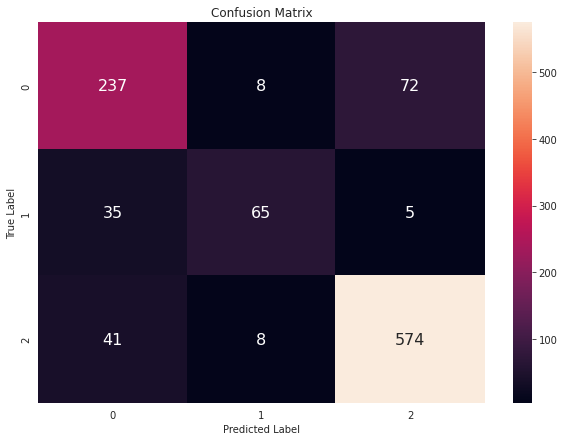

In [32]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def plot_confusion_matric(ytest, pred):
    conf_mat = pd.DataFrame(confusion_matrix(y_test, pred))
    fig = plt.figure(figsize = (10, 7))
    sns.heatmap(conf_mat, annot = True, annot_kws={"size": 16}, fmt="g")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matric(y_test, pred)



In [33]:
#Test
Test = '''kamu sich jahat'''
text = count_vect.transform([cleaning(Test)])
hasil = NN_bow.predict(text)[0]
print ("sentiment:")
print(hasil)


sentiment:
negative


In [34]:
#Simpan model

with open('featurebows.pickle', 'wb') as handle:
  pickle.dump(X_bow, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print("featurebow.pickle telah dibuat")

with open('ModelNN.pickle', 'wb') as handle:
  pickle.dump(NN_bow, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print("ModelNN.pickle telah dibuat")

with open('featuretfidf.pickle', 'wb') as handle:
  pickle.dump(X_tfidf, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print("featuretfidf.pickle telah dibuat")

with open('ModelNN_tfidf.pickle', 'wb') as handle:
  pickle.dump(NN_tfidf, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print("ModelNN_tfidf.pickle telah dibuat") 

featurebow.pickle telah dibuat
ModelNN.pickle telah dibuat
featuretfidf.pickle telah dibuat
ModelNN_tfidf.pickle telah dibuat
